# Introduction

On va s'intéresser à la gestion des données manquantes dans un DataFrame

# Import des modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Lecture des données contenues dans datas.csv

In [3]:
df = pd.read_csv('datas.csv', index_col=0)

# Aperçu des 5 premières lignes

In [4]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Vol_0,8,1,705.0,NaN,US,PBI,DCA,857,0,0,0,0,0
Vol_1,10,3,705.0,920.0,US,PBI,DCA,857,0,0,0,0,0
Vol_2,12,5,700.0,922.0,US,PBI,DCA,857,0,0,0,0,0
Vol_3,14,7,700.0,910.0,US,PBI,DCA,857,0,0,0,0,0
Vol_4,16,2,724.0,921.0,US,PBI,DCA,857,0,0,0,0,0


# Premières infos statistiques

In [5]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,297324.000000,297324.000000,297324.000000,297026.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000
mean,15.903449,3.746162,1338.023937,1486.588686,732.252496,2.919949,0.549064,3.238935,0.014462,4.067243
std,8.943123,1.987111,473.366590,496.272674,578.786571,17.284349,7.380609,14.540800,0.805157,18.226187
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,930.000000,1109.000000,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16.000000,4.000000,1327.000000,1516.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,5.000000,1730.000000,1909.000000,958.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,31.000000,7.000000,2431.000000,2550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000


# Compte des valeurs présentes pour chaque colonne

In [6]:
df.count()

DayofMonth           297324
DayOfWeek            297324
DepTime              297324
ArrTime              297026
UniqueCarrier        297324
Origin               297324
Dest                 297324
Distance             297324
CarrierDelay         297324
WeatherDelay         297324
NASDelay             297324
SecurityDelay        297324
LateAircraftDelay    297324
dtype: int64

# Transformer DepTime et ArrTime en temps en minute

In [7]:
df.DepTime = [(x // 100) * 60 + x % 100 for x in df.DepTime]

In [8]:
df.ArrTime = [(x // 100) * 60 + x % 100 for x in df.ArrTime]

In [9]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0


# Gestion des manquants

Environ 1 ArrTime sur 1000 est manquant. On va explorer différentes façons de gérer ces valeurs manquantes

### On peut simplement supprimer les lignes concernées

In [10]:
df_sup = df.dropna()

In [11]:
df_sup.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0
Vol_5,18,4,418.0,549.0,US,PBI,DCA,857,0,0,0,0,0


### On peut remplacer les manquants par une valeur constante, par exemple basée sur le temps de vol moyen ou median

In [12]:
df['FlightTime'] = [y - x for x, y in zip(df.DepTime, df.ArrTime)]

In [13]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,NaN
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,135.0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,142.0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,130.0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,117.0


In [14]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime
count,297324.000000,297324.000000,297324.000000,297026.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297026.000000
mean,15.903449,3.746162,814.659257,903.694663,732.252496,2.919949,0.549064,3.238935,0.014462,4.067243,89.024321
std,8.943123,1.987111,283.953208,297.834452,578.786571,17.284349,7.380609,14.540800,0.805157,18.226187,212.653588
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1429.000000
25%,8.000000,2.000000,570.000000,669.000000,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
50%,16.000000,4.000000,807.000000,916.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
75%,24.000000,5.000000,1050.000000,1149.000000,958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,149.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,786.000000


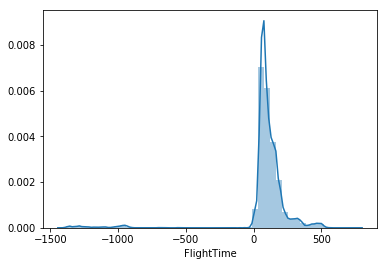

In [15]:
sns.distplot(df.dropna().FlightTime)

In [16]:
df['FlightTime'] = [y - x if y - x >= 0 else y - x + 1440 for x, y in zip(df.DepTime, df.ArrTime)]

In [17]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime
count,297324.000000,297324.000000,297324.000000,297026.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297324.000000,297026.000000
mean,15.903449,3.746162,814.659257,903.694663,732.252496,2.919949,0.549064,3.238935,0.014462,4.067243,132.060554
std,8.943123,1.987111,283.953208,297.834452,578.786571,17.284349,7.380609,14.540800,0.805157,18.226187,130.160160
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,2.000000,570.000000,669.000000,317.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000
50%,16.000000,4.000000,807.000000,916.000000,576.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000
75%,24.000000,5.000000,1050.000000,1149.000000,958.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,1439.000000


In [18]:
df = df[-(df.FlightTime > 1200)]

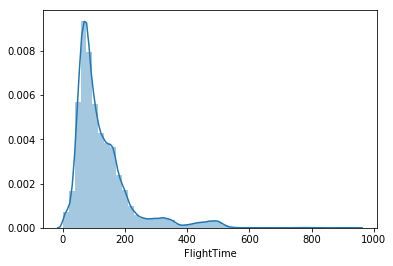

In [19]:
sns.distplot(df.dropna().FlightTime)

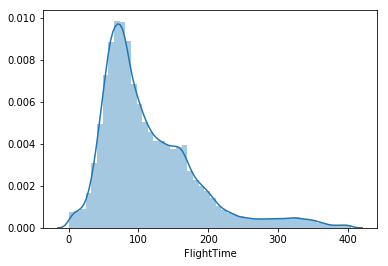

In [24]:
sns.distplot(df[(df.FlightTime < df.FlightTime.mean() + 3*df.FlightTime.std()) & (df.FlightTime > df.FlightTime.mean() - 3*df.FlightTime.std())]

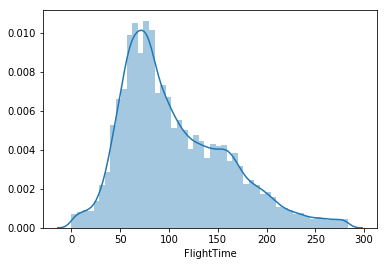

In [23]:
IQR = df.FlightTime.quantile(0.75) - df.FlightTime.quantile(0.25)
sns.distplot(df[(df.FlightTime < df.FlightTime.quantile(0.75) + 1.5*IQR) & (df.FlightTime > df.FlightTime.quantile(0.25) - 1.5*IQR)].FlightTime)

In [19]:
meanFlightTime = df.FlightTime.mean()
meanFlightTime

125.67609464973239

In [20]:
medianFlightTime = df.FlightTime.median()
medianFlightTime

98.0

In [21]:
df['ArrTime_meanFlightTime'] = [x + meanFlightTime if np.isnan(y) else y for x, y in zip(df.DepTime, df.ArrTime)]

In [22]:
df['ArrTime_medianFlightTime'] = [x + medianFlightTime if np.isnan(y) else y for x, y in zip(df.DepTime, df.ArrTime)]

In [23]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,NaN,550.676095,523.0
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,135.0,560.000000,560.0
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,142.0,562.000000,562.0
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,130.0,550.000000,550.0
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,117.0,561.000000,561.0


In [24]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime
count,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000
mean,15.902617,3.745856,814.633135,904.146660,734.895407,2.921861,0.547210,3.247553,0.014533,4.068033,125.676095,904.171981,904.144106
std,8.943010,1.986943,283.874985,297.753045,578.950491,17.298350,7.367912,14.548054,0.807129,18.216345,93.201001,297.753499,297.752442
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,8.000000,2.000000,570.000000,670.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,670.000000,670.000000
50%,16.000000,4.000000,807.000000,916.000000,581.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,916.000000,916.000000
75%,24.000000,5.000000,1050.000000,1150.000000,964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,1150.000000,1150.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,946.000000,1550.000000,1550.000000


### On peut remplacer les manquants d'après le temps de vol moyen pour chaque couple (Origin Dest)

In [25]:
flighTimePerRoute = df[['Origin', 'Dest', 'FlightTime']].groupby(['Origin', 'Dest']).mean()

In [26]:
flighTimePerRoute

FlightTime
Origin Dest            
ABE    ATL   120.355556
       CLE    75.583333
       CLT    93.400000
       CVG    96.297297
       JFK    52.500000
       ORD    63.245902
ABI    DFW    55.398305
ABQ    AMA   111.580645
       ATL   298.186441
       BWI   333.666667
       CVG   295.617647
       DAL   151.800000
       DEN    71.506849
       DFW   158.322314
       ELP    46.609756
       HOU   170.891304
       IAH   188.700935
       LAS    27.041237
       LAX    53.690265
       LBB   116.733333
       MAF   115.800000
       MCI   165.838710
       MCO   319.967742
       MDW   215.821429
       MSP   209.645161
       OAK    81.795455
       ORD   222.400000
       PDX   103.692308
       PHX    12.060086
       SAN    42.500000
...                 ...
TYS    CLE    86.428571
       CVG    64.480000
       DEN    70.900000
       DFW    82.491803
       EWR   119.913043
       IAH    83.962963
       LGA   119.166667
       ORD    46.709677
VLD    ATL    65.066667
VPS    ATL   126.787037
       DFW   126.983333
       IAH   111.181818
       MEM    90.148936
WRG    KTN    30.461538
       PSG    27.125000
XNA    ATL   164.628571
       CVG   160.588235
       DEN    49.093750
       DFW    67.556391
       EWR   240.571429
       IAH   101.561404
       LAX    77.000000
       LGA   241.545455
       ORD   102.717172
       SLC   112.727273
YAK    CDV    43.352941
       JNU    46.866667
YUM    IPL    30.869565
       LAX    72.025641
       PHX    60.636364

[4002 rows x 1 columns]

In [27]:
df['ArrTime_FlightTimePerRoute'] = [x + flighTimePerRoute.loc[z].loc[t].values[0] if np.isnan(y) else y for x, y, z, t in zip(df.DepTime, df.ArrTime, df.Origin, df.Dest)]

In [28]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime,ArrTime_FlightTimePerRoute
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,NaN,550.676095,523.0,559.227273
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,135.0,560.000000,560.0,560.000000
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,142.0,562.000000,562.0,562.000000
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,130.0,550.000000,550.0,550.000000
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,117.0,561.000000,561.0,561.000000


In [29]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime,ArrTime_FlightTimePerRoute
count,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000
mean,15.902617,3.745856,814.633135,904.146660,734.895407,2.921861,0.547210,3.247553,0.014533,4.068033,125.676095,904.171981,904.144106,904.168793
std,8.943010,1.986943,283.874985,297.753045,578.950491,17.298350,7.367912,14.548054,0.807129,18.216345,93.201001,297.753499,297.752442,297.766336
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,8.000000,2.000000,570.000000,670.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,670.000000,670.000000,670.000000
50%,16.000000,4.000000,807.000000,916.000000,581.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,916.000000,916.000000,916.000000
75%,24.000000,5.000000,1050.000000,1150.000000,964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,1150.000000,1150.000000,1150.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,946.000000,1550.000000,1550.000000,2221.090909


In [30]:
df['ArrTime_FlightTimePerRoute'] = [x if x < 1440 else x - 1440 for x in df.ArrTime_FlightTimePerRoute]

In [31]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime,ArrTime_FlightTimePerRoute
count,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000
mean,15.902617,3.745856,814.633135,904.146660,734.895407,2.921861,0.547210,3.247553,0.014533,4.068033,125.676095,904.171981,904.144106,902.995853
std,8.943010,1.986943,283.874985,297.753045,578.950491,17.298350,7.367912,14.548054,0.807129,18.216345,93.201001,297.753499,297.752442,298.389955
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,8.000000,2.000000,570.000000,670.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,670.000000,670.000000,669.000000
50%,16.000000,4.000000,807.000000,916.000000,581.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,916.000000,916.000000,916.000000
75%,24.000000,5.000000,1050.000000,1150.000000,964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,1150.000000,1150.000000,1149.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,946.000000,1550.000000,1550.000000,1439.000000


### On peut remplacer les manquants d'après une régression du temps de vol en fonction de la distance (en utilisant linregress de scipy)

In [32]:
from scipy.stats import linregress

In [33]:
slope, intercept, r_value, p_value, std_err = linregress(df.dropna().Distance, df.FlightTime.dropna())

In [34]:
slope, intercept, r_value, p_value, std_err

(0.1188107088598277,
 38.36240361058873,
 0.7379948919962781,
 0.0,
 0.00019982495002261982)

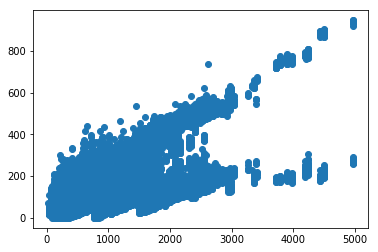

In [35]:
plt.scatter(df.Distance, df.FlightTime)

In [36]:
df['ArrTime_regress'] = [x + slope * y + intercept if np.isnan(z) else z for x, y, z in zip(df.DepTime, df.Distance, df.ArrTime)]

In [37]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime,ArrTime_FlightTimePerRoute,ArrTime_regress
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,NaN,550.676095,523.0,559.227273,565.183181
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,135.0,560.000000,560.0,560.000000,560.000000
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,142.0,562.000000,562.0,562.000000,562.000000
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,130.0,550.000000,550.0,550.000000,550.000000
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,117.0,561.000000,561.0,561.000000,561.000000


In [38]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime,ArrTime_FlightTimePerRoute,ArrTime_regress
count,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000,295872.000000
mean,15.902617,3.745856,814.633135,904.146660,734.895407,2.921861,0.547210,3.247553,0.014533,4.068033,125.676095,904.171981,904.144106,902.995853,904.171735
std,8.943010,1.986943,283.874985,297.753045,578.950491,17.298350,7.367912,14.548054,0.807129,18.216345,93.201001,297.753499,297.752442,298.389955,297.763481
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,8.000000,2.000000,570.000000,670.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,670.000000,670.000000,669.000000,670.000000
50%,16.000000,4.000000,807.000000,916.000000,581.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,916.000000,916.000000,916.000000,916.000000
75%,24.000000,5.000000,1050.000000,1150.000000,964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,1150.000000,1150.000000,1149.000000,1150.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,946.000000,1550.000000,1550.000000,1439.000000,1911.901141


In [39]:
df['ArrTime_regress'] = [x if x < 1440 else x - 1440 for x in df.ArrTime_regress]

In [40]:
df.describe()

,DayofMonth,DayOfWeek,DepTime,ArrTime,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_meanFlightTime,ArrTime_medianFlightTime,ArrTime_FlightTimePerRoute,ArrTime_regress
count,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295872.000000,295574.000000,295872.000000,295872.000000,295872.000000,295872.000000
mean,15.902617,3.745856,814.633135,904.146660,734.895407,2.921861,0.547210,3.247553,0.014533,4.068033,125.676095,904.171981,904.144106,902.995853,902.993928
std,8.943010,1.986943,283.874985,297.753045,578.950491,17.298350,7.367912,14.548054,0.807129,18.216345,93.201001,297.753499,297.752442,298.389955,298.394514
min,1.000000,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,8.000000,2.000000,570.000000,670.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.000000,670.000000,670.000000,669.000000,669.000000
50%,16.000000,4.000000,807.000000,916.000000,581.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.000000,916.000000,916.000000,916.000000,916.000000
75%,24.000000,5.000000,1050.000000,1150.000000,964.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000,1150.000000,1150.000000,1149.000000,1149.000000
max,31.000000,7.000000,1471.000000,1550.000000,4962.000000,1064.000000,646.000000,495.000000,179.000000,515.000000,946.000000,1550.000000,1550.000000,1439.000000,1439.000000


# Sauvegarder le nouveau DataFrame en supprimant les estimations de ArrTime les moins pertinentes

In [42]:
df.drop(['ArrTime_meanFlightTime', 'ArrTime_medianFlightTime', 'ArrTime_regress'], axis=1, inplace=True)

In [43]:
df.head()

,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,Origin,Dest,Distance,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FlightTime,ArrTime_FlightTimePerRoute
Vol_0,8,1,425.0,NaN,US,PBI,DCA,857,0,0,0,0,0,NaN,559.227273
Vol_1,10,3,425.0,560.0,US,PBI,DCA,857,0,0,0,0,0,135.0,560.000000
Vol_2,12,5,420.0,562.0,US,PBI,DCA,857,0,0,0,0,0,142.0,562.000000
Vol_3,14,7,420.0,550.0,US,PBI,DCA,857,0,0,0,0,0,130.0,550.000000
Vol_4,16,2,444.0,561.0,US,PBI,DCA,857,0,0,0,0,0,117.0,561.000000


In [44]:
df.to_csv('datas_new.csv')